<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>Time Series</strong></p> 

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>______________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Tendencia:</strong>
la tendencia muestra la tendencia de los datos a aumentar o disminuir durante un largo período de tiempo y filtra las variaciones estacionales.<BR><BR>
<strong>Estacionalidad:</strong> La
estacionalidad son las variaciones que ocurren durante un período corto de tiempo y no es lo suficientemente prominente como para ser llamada «tendencia».
</p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>y(t) = g(t) + s(t) + h(t) + e(t)</strong></p> 

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>g(t)</strong> se refiere a la tendencia(cambios durante un largo período de tiempo)<BR>
<strong>s(t)</strong> se refiere a la estacionalidad(cambios periódicos o de corto plazo)<BR>
<strong>h(t)</strong> se refiere a los efectos de las vacaciones en el pronóstico<BR>
<strong>e(t)</strong> se refiere a los cambios incondicionales que son específicos<BR>
<strong>y(t)</strong> es el pronóstico.</p>     

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>______________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:12px;color:#16268a;font-family:'Avantgarde';text-align:right;border-radius:5px;">
<strong>
<a href="https://ichi.pro/es/analisis-de-series-de-tiempo-con-facebook-prophet-como-funciona-y-como-usarlo-265389504990778/" target=\"_blank\">Análisis de series de tiempo</a>
</strong></p>
<p style="font-size:12px;color:#16268a;font-family:'Avantgarde';text-align:right;border-radius:5px;">
<strong>
<a href="https://facebook.github.io/prophet/docs/quick_start.html" target=\"_blank\">FBProphet Help</a>
</strong></p>


In [ ]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING) 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

In [ ]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.4.4


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1158 non-null   object
 1   cases   1158 non-null   int64 
 2   deaths  1158 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 27.3+ KB


In [ ]:
df.sample(5)

,date,cases,deaths
1021,2022-11-07,97515570,1068574
864,2022-06-03,84613605,1004941
111,2020-05-11,1354449,80747
574,2021-08-17,37133674,623237
848,2022-05-18,82867288,999607


In [ ]:
df['new_cases'] = df.cases - df.cases.shift().fillna(0)

In [ ]:
df.head()

,date,cases,deaths,new_cases
0,2020-01-21,1,0,1.0
1,2020-01-22,1,0,0.0
2,2020-01-23,1,0,0.0
3,2020-01-24,2,0,1.0
4,2020-01-25,3,0,1.0


In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
df.head()

,date,cases,deaths,new_cases
0,2020-01-21,1,0,1.0
1,2020-01-22,1,0,0.0
2,2020-01-23,1,0,0.0
3,2020-01-24,2,0,1.0
4,2020-01-25,3,0,1.0


In [ ]:
df.set_index('date',inplace=True)

In [ ]:
df.head()

,cases,deaths,new_cases
date,,,
2020-01-21,1,0,1.0
2020-01-22,1,0,0.0
2020-01-23,1,0,0.0
2020-01-24,2,0,1.0
2020-01-25,3,0,1.0


In [ ]:
df['rolling_weekly_avg'] = df.new_cases.rolling(window=7).mean().fillna(0)

In [ ]:
df.head()

,cases,deaths,new_cases,rolling_weekly_avg
date,,,,
2020-01-21,1,0,1.0,0.0
2020-01-22,1,0,0.0,0.0
2020-01-23,1,0,0.0,0.0
2020-01-24,2,0,1.0,0.0
2020-01-25,3,0,1.0,0.0


<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Configuración para fbprophet</strong></p> 

In [ ]:
ts = pd.DataFrame({'ds':df.index,'y':df.new_cases})

In [ ]:
ts.head()

,ds,y
date,,
2020-01-21,2020-01-21,1.0
2020-01-22,2020-01-22,0.0
2020-01-23,2020-01-23,0.0
2020-01-24,2020-01-24,1.0
2020-01-25,2020-01-25,1.0


In [ ]:
#!pip install pystan==2.19
#!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
prophet = Prophet()

In [ ]:
prophet.fit(ts);

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98ygsf6h/a9fcw5ma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98ygsf6h/9fqbmnw1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90041', 'data', 'file=/tmp/tmp98ygsf6h/a9fcw5ma.json', 'init=/tmp/tmp98ygsf6h/9fqbmnw1.json', 'output', 'file=/tmp/tmp98ygsf6h/prophet_modelcdvdv7hv/prophet_model-20230406190046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:00:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:00:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>El pronóstico contendrá una predicción para cada valor histórico presente en el conjunto de datos más pronósticos adicionales para el número de períodos pasados por el método (25)</strong></p> 

In [ ]:
future = prophet.make_future_dataframe(periods=25)

In [ ]:
future.head()

,ds
0,2020-01-21
1,2020-01-22
2,2020-01-23
3,2020-01-24
4,2020-01-25


<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Hacer la estimación</strong></p> 

In [ ]:
forecast = prophet.predict(future)

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>ds contiene la entrada de la marca de tiempo del pronóstico<br>
yhat contiene el valor previsto de la serie temporal<br>
yhat_lower contiene la parte inferior del intervalo de confianza para el pronóstico<br>
yhat_upper contiene la parte inferior del intervalo de confianza para el pronóstico<br></strong></p> 

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-21,204965.503,87950.075,316274.320
1,2020-01-22,214434.200,102352.770,336951.691
2,2020-01-23,189253.316,82574.858,297382.534
3,2020-01-24,174333.629,58489.638,285493.126
4,2020-01-25,109757.239,2910.775,212144.834


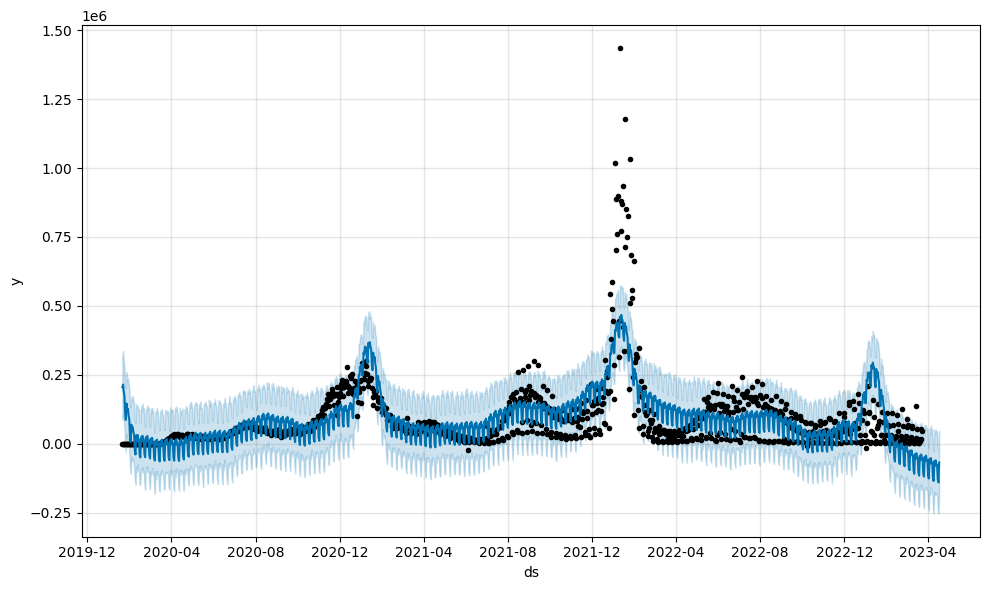

In [ ]:
fig = prophet.plot(forecast)

In [ ]:
from prophet.plot import add_changepoints_to_plot

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Cambio de Tendencia</strong></p> 
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Prophet detecta los puntos de cambio especificando primero un gran número de puntos de cambio potenciales</strong></p> 

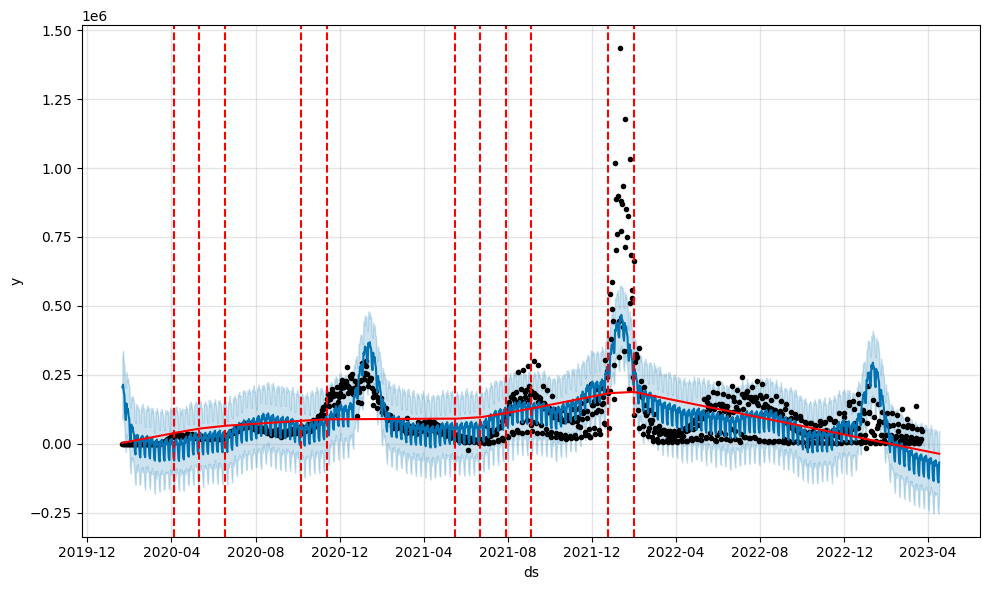

In [ ]:
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
fig

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Prophet detecto una estacionalidad semanal de los nuevos casos notificados y una tendencia general al alza. También agregó puntos de cambio durante el verano y el otoño para modelar mejor el gran aumento en la tasa de nuevos casos</strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Prophet no pudo incorporar la recesión en los nuevos casos de COVID después del nuevo año. Establecer el changepoint_range = 1.
</strong></p>     

In [ ]:
prophet = Prophet(weekly_seasonality=False, changepoint_range=1,changepoint_prior_scale=0.75)

In [ ]:
prophet.fit(ts);

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98ygsf6h/rdjk_z3y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98ygsf6h/1omrexe6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60194', 'data', 'file=/tmp/tmp98ygsf6h/rdjk_z3y.json', 'init=/tmp/tmp98ygsf6h/1omrexe6.json', 'output', 'file=/tmp/tmp98ygsf6h/prophet_modelwygo6o0y/prophet_model-20230406193206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:32:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:32:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = prophet.make_future_dataframe(periods=25)

In [ ]:
forecast = prophet.predict(future)

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-21,91941.490,-7870.369,186110.703
1,2020-01-22,83482.086,-23817.233,178062.603
2,2020-01-23,74435.428,-27639.140,170321.363
3,2020-01-24,64958.151,-27589.829,164044.445
4,2020-01-25,55208.188,-46885.884,149825.528


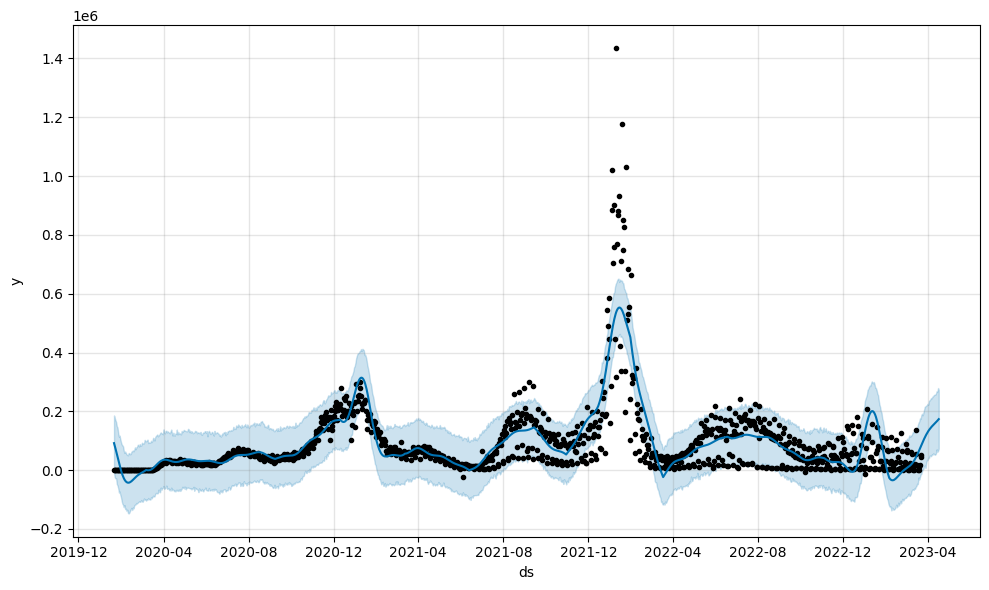

In [ ]:
fig = prophet.plot(forecast)

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>______________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:12px;color:#16268a;font-family:'Avantgarde';text-align:right;border-radius:5px;">
<strong>
<a href="https://es.acervolima.com/2021/02/09/analisis-de-series-de-tiempo-usando-facebook-prophet/" target=\"_blank\">Ejemplo adaptado para el curso de Análisis de series de tiempo usando Facebook Prophety</a>
</strong></p>

In [ ]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING) 

In [ ]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
import pandas as pd 
from prophet import Prophet 
from prophet.plot import add_changepoints_to_plot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('./drive/MyDrive/Robots TPP/airpassengers.csv')

In [ ]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df = pd.DataFrame() 
df['ds'] = pd.to_datetime(data['Month']) 
df['y'] = data['#Passengers'] 
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
m = Prophet() 

In [ ]:
m.fit(df);

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98ygsf6h/2lej0oez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98ygsf6h/tvsufomn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65767', 'data', 'file=/tmp/tmp98ygsf6h/2lej0oez.json', 'init=/tmp/tmp98ygsf6h/tvsufomn.json', 'output', 'file=/tmp/tmp98ygsf6h/prophet_modeldqigy69s/prophet_model-20230406193419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:34:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:34:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>
El modelo prediga los próximos 5 años, es decir, hasta 1965.
La frecuencia de nuestros datos es de 1 mes y, por lo tanto, durante 5 años, es 12 * 5 = 60 meses.<BR> 
Por lo tanto, se agrega 60 filas de datos mensuales a un marco de datos.
</strong></p> 

In [ ]:
future = m.make_future_dataframe(periods=12 * 5,
                                 freq='MS') 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>
El argumento de frecuencia acepta cualquier cosa que pandas identifique como una cadena de frecuencia. En este caso, usamos 'MS', para el inicio del mes (month start).
</strong></p> 

In [ ]:
forecast = m.predict(future) 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>
El pronóstico trazado una vez que se le indique a Prophet que prediga solo el primer día de cada mes.
</strong></p> 

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
199,1965-08-01,724.557,694.432,754.629,656.354,649.283,663.030
200,1965-09-01,675.997,645.565,705.342,659.480,652.279,666.326
201,1965-10-01,640.836,612.430,670.456,662.505,655.188,669.623
202,1965-11-01,606.980,577.833,637.409,665.631,658.193,672.932
203,1965-12-01,636.342,606.739,665.663,668.656,661.052,676.114


<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Predicción</strong></p> 

In [ ]:
fig1 = m.plot(forecast)

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>
Esta serie de tiempo tiene un ciclo anual claro.<BR>
La estacionalidad no es un factor aditivo constante, sino que crece con la tendencia<BR>
Esto se llama Estacionalidad Multiplicativa.    
</strong></p> 

In [ ]:
modelEstMult = Prophet(seasonality_mode='multiplicative',
                       weekly_seasonality=True,
                       daily_seasonality=True) 

In [ ]:
modelEstMult.fit(df);

DEBUG:cmdstanpy:input tempfile: /tmp/tmp98ygsf6h/dpwov_b8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98ygsf6h/tc5tgsdk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37747', 'data', 'file=/tmp/tmp98ygsf6h/dpwov_b8.json', 'init=/tmp/tmp98ygsf6h/tc5tgsdk.json', 'output', 'file=/tmp/tmp98ygsf6h/prophet_modelr801n7cq/prophet_model-20230406193425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:34:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:34:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
futureEstMult = modelEstMult.make_future_dataframe(periods=12 * 5,
                                                   freq='MS')

In [ ]:
forecastEstMult = modelEstMult.predict(futureEstMult)

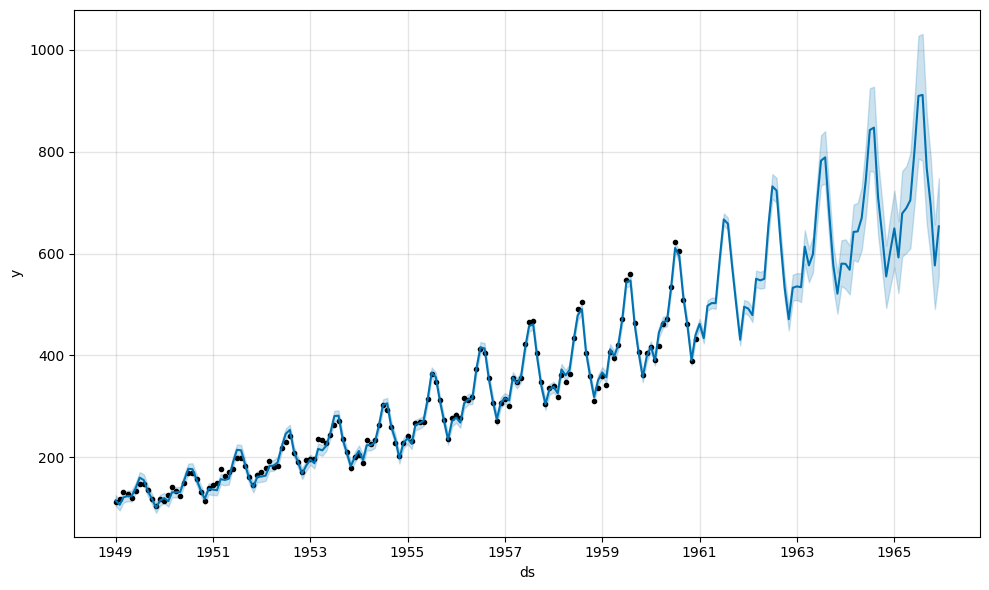

In [ ]:
fig = modelEstMult.plot(forecastEstMult)
plt.show()

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>
Se puede observar como la tendencia es mejor representada por la serie.    
</strong></p> 

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Tendencias y Estacionalidad</strong></p> 

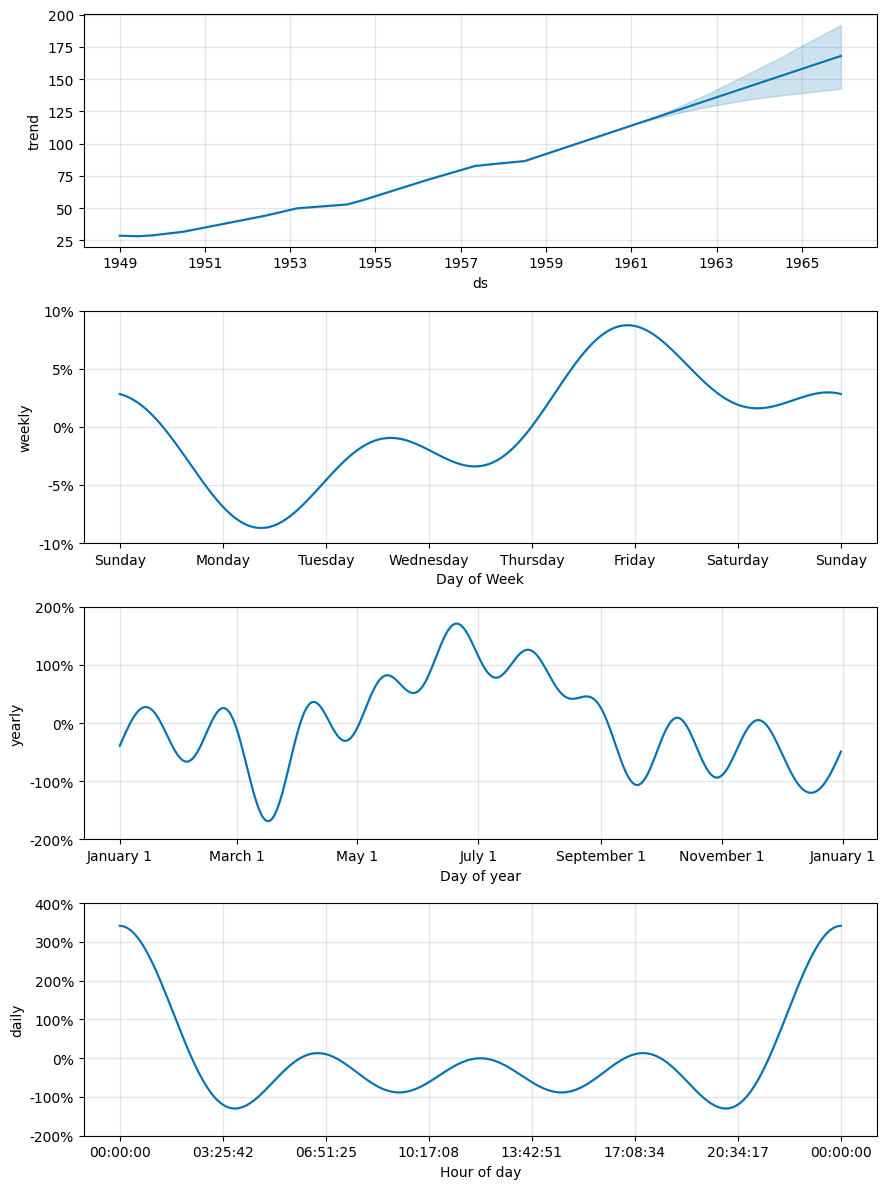

In [ ]:
fig2 = modelEstMult.plot_components(forecastEstMult) 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
Con <strong>seasonality_mode = 'multiplicative'</strong>, los efectos de vacaciones también se modelarán como multiplicativos.<BR>
Cualquier <strong>estacionalidad</strong> agregada o regresor adicional usará por defecto el <strong>estacionalidad_mode</strong>.<BR>
</p> 

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Cambio de Tendencia</strong></p> 

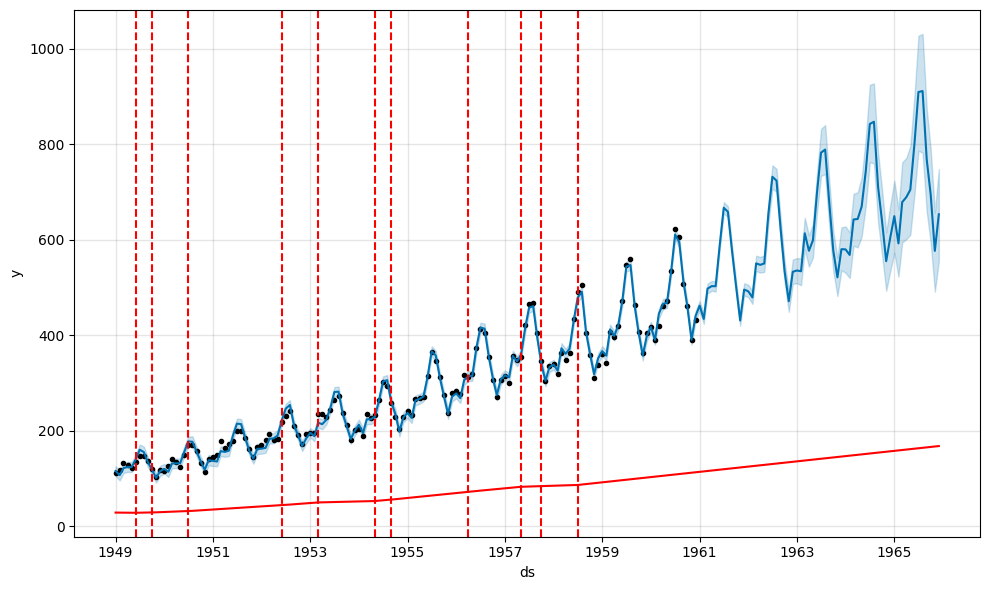

In [ ]:
fig = modelEstMult.plot(forecastEstMult) 
a = add_changepoints_to_plot(fig.gca(), modelEstMult, forecastEstMult)

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>______________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:12px;color:#16268a;font-family:'Avantgarde';text-align:right;border-radius:5px;">
<strong>
<a href="https://programmerclick.com/article/47711488583/" target=\"_blank\">Ejemplo adaptado para el curso de Pronóstico de series de tiempo en Python con Prophet</a>
</strong></p>

In [ ]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING) 

In [ ]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
pred = pd.read_csv("./data/covid_19_data.csv")

FileNotFoundError: ignored

In [ ]:
pred.head()

NameError: ignored

In [ ]:
predgrp = pred.groupby("ObservationDate")[["Confirmed","Recovered","Deaths"]].sum().reset_index()

In [ ]:
predgrp.head()

In [ ]:
pred_cnfrm = pred.loc[:,["ObservationDate","Confirmed"]]

In [ ]:
pred_cnfrm.head()

In [ ]:
pr_data = pred_cnfrm
pr_data.columns = ['ds','y']
pr_data.head()

In [ ]:
m=Prophet()

In [ ]:
m.fit(pr_data);

In [ ]:
future=m.make_future_dataframe(periods=15)   # Predicción 15 días

In [ ]:
forecast=m.predict(future)

In [ ]:
forecast.head().T

In [ ]:
m.plot(forecast,xlabel='Date',ylabel='Confirmed Count', uncertainty=True)

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Tendencias y Estacionalidad</strong></p> 

In [ ]:
m.plot_components(forecast)

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>______________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Salto en los Datos</strong></p> 

<a id = "1.0"></a>
<p style="font-size:12px;color:#16268a;font-family:'Avantgarde';text-align:right;border-radius:5px;">
<strong>
<a href="https://www.packtpub.com/product/forecasting-time-series-data-with-facebook-prophet/9781800568532/" target=\"_blank\">Forecasting-Time-Series-Data-with-Facebook-Prophet</a>
</strong></p>

In [ ]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING) 

In [ ]:
df = pd.read_csv('./data/divvy_hourly.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], s=1, c='#0072B2')
plt.show()

In [ ]:
model = Prophet(seasonality_mode='multiplicative')

In [ ]:
model.fit(df);

In [ ]:
future = model.make_future_dataframe(periods=365 * 24, freq='h')

In [ ]:
forecast = model.predict(future)

In [ ]:
fig = model.plot(forecast)

In [ ]:
plt.show()

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>La predicción tiene una cantidad alta incertidumbre.</strong></p> 

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Los datos contienen algunas estacionalidades muy complejas que Prophet no puede modelar completamente.</strong></p>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Existe una estacionalidad diaria dentro de la estacionalidad del año. Es estacionalidad dentro de la estacionalidad.</strong></p>

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Manejo de Datos Faltantes.</strong></p>

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
Prophet es robusto en el manejo de <strong>valores perdidos</strong>.<BR>
Sin embargo, cuando esos datos faltantes ocurren a intervalos regulares, Prophet no tendrá ningún dato de entrenamiento durante esos intervalos para hacer estimaciones.<BR>
La <strong>estacionalidad estará restringida durante los períodos</strong> en los que existan datos, pero sin restricciones durante las brechas, y las predicciones de Prophet pueden ver fluctuaciones mucho mayores que los datos reales mostrados.
</p>

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
La solución es <strong>modificar</strong> el DataFrame para <strong>excluir aquellos momentos en los que nuestros datos de entrenamiento tenían vacíos</strong>.<BR>
</p>


In [ ]:
df = df[(df['ds'].dt.hour >= 8) & (df['ds'].dt.hour < 18)]

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], s=1, c='#0072B2')
plt.show()

In [ ]:
model = Prophet(seasonality_mode='multiplicative')

In [ ]:
model.fit(df);

In [ ]:
future = model.make_future_dataframe(periods=365 * 24, freq='h')

In [ ]:
forecast = model.predict(future)

In [ ]:
fig = model.plot(forecast)
plt.show();

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Lo que se esta viendo son estimaciones ilimitadas en el período futuro que provocan amplias fluctuaciones en las predicciones.</strong></p>

In [ ]:
fig = model.plot(forecast)
plt.xlim(pd.to_datetime(['2018-08-01', '2018-08-04']))
plt.ylim(-2000, 4000)
plt.show();

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>La solución a este problema es simplemente modificar el DataFrame futuro para excluir aquellos momentos en los que nuestros datos de entrenamiento tenían vacíos regulares.</strong></p>

In [ ]:
future2 = future[(future['ds'].dt.hour >= 8) &
                 (future['ds'].dt.hour < 18)]

In [ ]:
forecast2 = model.predict(future2)

In [ ]:
fig = model.plot(forecast2)
plt.show();

In [ ]:
fig = model.plot(forecast2, figsize=(10, 4))
plt.xlim(pd.to_datetime(['2018-08-01', '2018-08-04']))
plt.ylim(-2000, 4000)
plt.show();

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Lo que se ve es la misma curva que antes para las horas entre las 8 am y las 6 pm, pero esta vez Prophet simplemente las conecta con una línea recta.<BR><BR>
De hecho, no hay datos en nuestro DataFrame de pronóstico para estos períodos de tiempo.</strong><BR><BR>
<strong>Prophet es un modelo de tiempo continuo, por lo que aunque el DataFrame de pronóstico ignora esos tiempos excluidos, las ecuaciones que sustentan el modelo se definen continuamente.</strong><BR><BR>

In [ ]:
from prophet.plot import plot_seasonality

In [ ]:
plot_seasonality(model, 'daily', figsize=(10, 3))
plt.show();

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>______________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Manejo de Fiestas y Fechas especiales</strong></p> 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('./data/divvy_hourly.csv')
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                daily_seasonality=True)

In [ ]:
model.add_country_holidays(country_name='US');

In [ ]:
model.fit(df);

In [ ]:
future = model.make_future_dataframe(periods=365)

In [ ]:
forecast = model.predict(future)

In [ ]:
fig = model.plot(forecast)
plt.show()

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
model.train_holiday_names

In [ ]:
def first_non_zero(fcst, holiday):
    return fcst[fcst[holiday] != 0][holiday].values[0]

pd.DataFrame({'holiday': model.train_holiday_names,
              'effect': [first_non_zero(forecast, holiday)
                         for holiday in model.train_holiday_names]})

In [ ]:
from prophet.make_holidays import make_holidays_df

In [ ]:
df.sample(10)

In [ ]:
year_list = df['ds'].dt.year.unique().tolist()

In [ ]:
year_list

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>Se agrega un año.</strong></p>

In [ ]:
year_list.append(year_list[-1] + 1)

In [ ]:
year_list

In [ ]:
holidays = make_holidays_df(year_list=year_list, country='US') # Cambiar a country='AR'

In [ ]:
holidays

In [ ]:
black_friday = pd.DataFrame({'holiday': 'Black Friday',
                             'ds': pd.to_datetime(['2014-11-28',
                                                   '2015-11-27',
                                                   '2016-11-25',
                                                   '2017-11-24',
                                                   '2018-11-23'])})

In [ ]:
christmas_eve = pd.DataFrame({'holiday': 'Christmas Eve',
                              'ds': pd.to_datetime(['2014-12-24',
                                                    '2015-12-24',
                                                    '2016-12-24',
                                                    '2017-12-24',
                                                    '2018-12-24'])})

In [ ]:
holidays = pd.concat([holidays, black_friday, christmas_eve]
                    ).sort_values('ds').reset_index(drop=True)

In [ ]:
holidays

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays,
                holidays_prior_scale=10,
                daily_seasonality=True)

In [ ]:
model.fit(df);

In [ ]:
future = model.make_future_dataframe(periods=0)

In [ ]:
forecast = model.predict(future)

In [ ]:
fig = model.plot(forecast)
plt.show()

In [ ]:
def first_non_zero(fcst, holiday):
    return fcst[fcst[holiday] != 0][holiday].values[0]

pd.DataFrame({'holiday': model.train_holiday_names,
              'effect': [first_non_zero(forecast, holiday)
                         for holiday in model.train_holiday_names]})

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>______________________</strong></p> 